ValueError: setting an array element with a sequence.

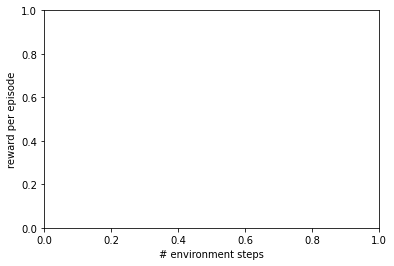

In [4]:
from absl.testing import absltest
from absl.testing import parameterized
from brax import envs
from brax.training import apg
import os
import jax
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle

os.environ['XLA_FLAGS'] = '--xla_force_host_platform_device_count=24'
jax.config.update('jax_platform_name', 'cpu')


episode_length=500
action_repeat=1
env_name = 'inverted_pendulum_swingup'
save_dir = 'save_1_bapg'
env_fn = envs.create_fn(env_name = env_name, action_repeat=action_repeat, batch_size=None, auto_reset=False)

xdata = []
ydata = []

for i in range(8):
    xdata = []
    ydata = []

    def progress(num_steps, metrics):
      xdata.append(num_steps)
      ydata.append(metrics['eval/episode_reward'])
      clear_output(wait=True)
      plt.xlabel('# environment steps')
      plt.ylabel('reward per episode')
      plt.plot(xdata, ydata)
      plt.show()

    inference_fn, params, metrics = apg.train(
        environment_fn=env_fn,
        episode_length=episode_length,
        action_repeat=action_repeat,
        num_envs=24,
        num_eval_envs=1,
        learning_rate=5e-4,
        normalize_observations=True,
        log_frequency=200*75,
        truncation_length=None,
        progress_fn=progress
    )
    
    pickle.dump(params, open(f"{save_dir}/{env_name}_params{i}.pkl", 'wb'))
    pickle.dump(metrics, open(f"{save_dir}/{env_name}_metrics{i}.pkl", 'wb'))
    pickle.dump(ydata, open(f"{save_dir}/{env_name}_rewards.pkl{i}", 'wb'))

In [ ]:
metrics